# РК1; ТМО; Сысойкин Егор; ИУ5-64Б

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Дополнительно: для произвольного столбца датасета построить скрипичную диаграмму (Violin plot).

https://www.kaggle.com/mathan/fifa-2018-match-statistics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/fifa.csv", sep=',')
data.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

In [3]:
data.shape

(128, 27)

In [4]:
data.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [5]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


## Обработка пропусков количественного столбца

In [6]:
data['Own goals'] = data['Own goals'].fillna(0.0)

In [7]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,0.0,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,0.0,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,0.0,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,0.0,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [8]:
data.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                   0
Own goal Time             116
dtype: int64

## Обработка пропусков категориального столбца

Т.к. У нас нет катеригориальных признаков в датасете с пропусками, сделаем их сами. Здесь заполняем пустым значением случайным образом строки столбца 'Round', с коэффициентом 30%

In [9]:
data['Round'].unique()

array(['Group Stage', 'Round of 16', 'Quarter Finals', 'Semi- Finals',
       '3rd Place', 'Final'], dtype=object)

In [10]:
import random
data_col = data['Round'].copy()
for i, item in enumerate(data_col):
    if random.randint(0,100) > 70:
        data_col[i] = np.nan
data['Round'] = data_col

In [11]:
data.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                      40
PSO                         0
Goals in PSO                0
Own goals                   0
Own goal Time             116
dtype: int64

In [12]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,NaN,No,0,0.0,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,0.0,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,NaN,No,0,0.0,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,NaN,No,0,0.0,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['Round'] = imp.fit_transform(data[['Round']])

In [15]:
data.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                   0
Own goal Time             116
dtype: int64

In [16]:
corr = data.corr()
corr

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
Goal Scored,1.000000,0.034759,0.144915,0.461702,-0.020374,-0.087072,0.040446,0.045105,0.046815,-0.118893,...,0.043971,0.014355,0.030331,-0.048838,-0.035031,-0.089714,-0.272170,-0.011204,-0.066164,-0.228729
Ball Possession %,0.034759,1.000000,0.541185,0.297234,0.361767,0.521510,0.542992,0.057706,0.273831,-0.293658,...,0.880611,-0.059054,-0.296477,-0.205511,0.090924,0.024316,-0.048316,-0.010086,0.059499,0.588196
Attempts,0.144915,0.541185,1.000000,0.731243,0.718972,0.754307,0.686892,-0.016508,0.140850,-0.268217,...,0.582831,0.171381,-0.248773,-0.185544,-0.074594,0.009795,0.072737,0.149836,-0.041677,-0.012727
On-Target,0.461702,0.297234,0.731243,1.000000,0.324672,0.331333,0.407576,0.073176,0.093090,-0.321557,...,0.348099,0.065475,-0.192242,-0.115259,-0.051742,-0.023439,-0.071730,0.040322,-0.071880,-0.328175
Off-Target,-0.020374,0.361767,0.718972,0.324672,1.000000,0.299712,0.440633,-0.095919,0.142367,-0.126644,...,0.398949,0.229930,-0.186858,-0.124094,-0.145577,-0.119332,0.109203,0.185807,-0.092474,0.300204
Blocked,-0.087072,0.521510,0.754307,0.331333,0.299712,1.000000,0.636172,-0.002231,0.086021,-0.142960,...,0.532913,0.082111,-0.174606,-0.163111,0.033717,0.165295,0.091321,0.108220,0.074879,0.014851
Corners,0.040446,0.542992,0.686892,0.407576,0.440633,0.636172,1.000000,-0.034054,0.085216,-0.233787,...,0.524661,0.099700,-0.165382,-0.169929,0.014543,0.117960,0.163760,0.088997,-0.028876,0.023942
Offsides,0.045105,0.057706,-0.016508,0.073176,-0.095919,-0.002231,-0.034054,1.000000,0.089121,0.006539,...,0.034715,0.031324,-0.040084,-0.047757,0.228531,-0.036432,-0.112602,-0.064892,-0.070461,-0.312680
Free Kicks,0.046815,0.273831,0.140850,0.093090,0.142367,0.086021,0.085216,0.089121,1.000000,-0.231637,...,0.175695,0.076927,0.080341,-0.026741,0.029701,-0.104164,-0.007801,0.138046,0.018867,-0.057103
Saves,-0.118893,-0.293658,-0.268217,-0.321557,-0.126644,-0.142960,-0.233787,0.006539,-0.231637,1.000000,...,-0.264425,0.125645,0.074976,0.009670,0.140307,0.016875,-0.127567,0.110014,0.069340,-0.063865


## Столбцы, которые можно использовать для машинного обучения (для разных целевых признаков)

In [17]:
from IPython.display import Markdown

def corr_values(series, feature):
    for k, v in series[feature].iteritems():
        if k != feature:
            yield (k, v)
            
for target in corr:
    good = [
        k
        for k, v in corr_values(corr, target)
        if v > 0.5
    ]
    
    if len(good) != 0:
        display(Markdown(f"- Хорошо коррелируют с целевым признаком ({target})): {', '.join(good)}"))

- Хорошо коррелируют с целевым признаком (Ball Possession %)): Attempts, Blocked, Corners, Pass Accuracy %, Passes, Own goal Time

- Хорошо коррелируют с целевым признаком (Attempts)): Ball Possession %, On-Target, Off-Target, Blocked, Corners, Passes

- Хорошо коррелируют с целевым признаком (On-Target)): Attempts

- Хорошо коррелируют с целевым признаком (Off-Target)): Attempts

- Хорошо коррелируют с целевым признаком (Blocked)): Ball Possession %, Attempts, Corners, Passes

- Хорошо коррелируют с целевым признаком (Corners)): Ball Possession %, Attempts, Blocked, Passes

- Хорошо коррелируют с целевым признаком (Pass Accuracy %)): Ball Possession %, Passes

- Хорошо коррелируют с целевым признаком (Passes)): Ball Possession %, Attempts, Blocked, Corners, Pass Accuracy %

- Хорошо коррелируют с целевым признаком (Distance Covered (Kms))): Goals in PSO

- Хорошо коррелируют с целевым признаком (Goals in PSO)): Distance Covered (Kms)

- Хорошо коррелируют с целевым признаком (Own goal Time)): Ball Possession %

## Violin plot

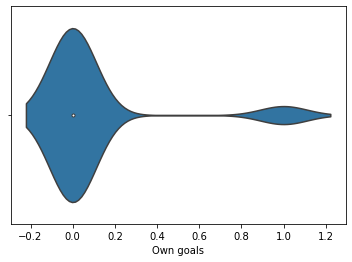

In [18]:
import seaborn as sb
sb.violinplot(x=data["Own goals"]);